In [1]:
import numpy as np
# import units as u
import numpy as np
import pandas as pd

import rasterio
from rasterio.plot import show_hist, show
import geopandas as gpd
import rasterstats
from shapely.geometry import shape

import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib import pyplot as plt

In [49]:
import seaborn as sns
sns.set_theme(style="ticks")

In [35]:
states_path = "data/states/nga_admbnda_adm1_osgof_20161215.shp"
states = gpd.read_file(states_path)

data_path_names = ["wind_speed", "temperature", "solar_flux"]

data_averages = {}
for name in data_path_names:
    data_averages[name] = pd.read_csv(f"clean_data/{name}.csv", index_col=0)

avg_vals = {n: i["value"] for n, i in data_averages.items()}

In [54]:
data_paths = {
    "wind_speed": "data/Nigeria_MeanWindSpeed/NGA_wind-speed_100m.tif", # m/s
    "temperature": "data/Nigeria_AvgDailyTotals_GlobalSolarAtlas_GEOTIFF/TEMP.tif", # ºC
    "solar_flux": "data/Nigeria_AvgDailyTotals_GlobalSolarAtlas_GEOTIFF/DNI.tif", #kwh/m2
}

raw_data = {}
for name, path in data_paths.items():
    data = rasterio.open(path)
    data_array = data.read()[0]
    raw_data[name] = (data, data_array)


## Resource Availability

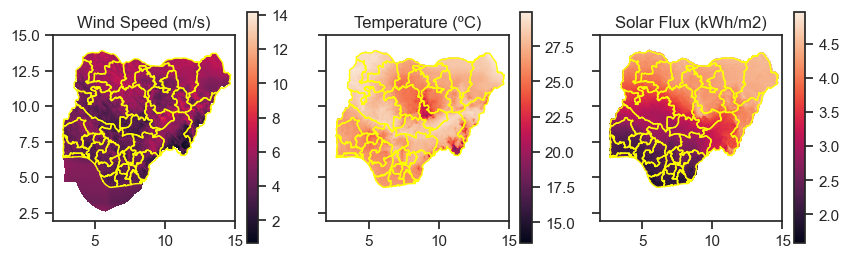

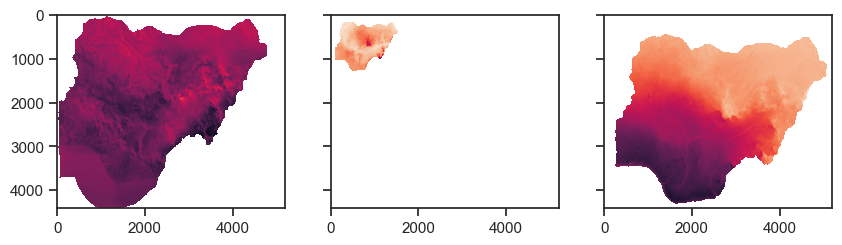

In [84]:
fig, axes = plt.subplots(1,3, figsize = (10, 3), sharey=True, sharex=True)
fig, axes0 = plt.subplots(1,3, figsize = (10, 3), sharey=True, sharex=True)

titles = ["Wind Speed (m/s)", "Temperature (ºC)", "Solar Flux (kWh/m2)"]


for ax, ax0, title, val_type in zip(axes, axes0, titles, raw_data.values()):
    image_hidden = ax0.imshow(val_type[1] )

    show(val_type[1], ax=ax, transform=val_type[0].transform )

    states.plot(ax=ax, legend=True, facecolor="None", edgecolor="yellow")

    fig.colorbar(image_hidden, ax=ax)
    
    ax.set_title(title)
plt.show()

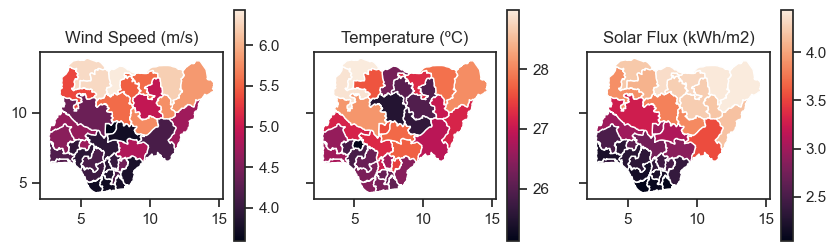

In [50]:
fig, axes = plt.subplots(1,3, figsize = (10, 3), sharey=True, sharex=True)

titles = ["Wind Speed (m/s)", "Temperature (ºC)", "Solar Flux (kWh/m2)"]

for ax, title, val_type in zip(axes, titles, avg_vals.values()):
    states.plot(ax=ax, column=val_type, legend=True)
    ax.set_title(title)
plt.show()

Text(0.5, 1.0, 'Averaged Data')

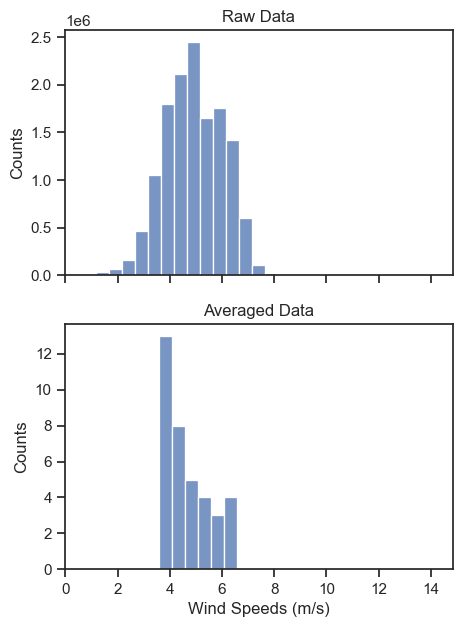

In [102]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (5, 7), sharex=True)
# simple probability distributions 
binwidth=0.5
sns.histplot(x=raw_data["wind_speed"][1].flatten(), ax=ax1, binwidth=binwidth)
sns.histplot(x=avg_vals["wind_speed"], ax=ax2, binwidth=binwidth)

ax2.set_xlabel('Wind Speeds (m/s)')
ax1.set_ylabel('Counts')
ax2.set_ylabel('Counts')

ax1.set_title('Raw Data')
ax2.set_title('Averaged Data')